In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditCardCust.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.drop('CUST_ID', axis= 1, inplace=True)

In [7]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
medianValue = df['MINIMUM_PAYMENTS'].astype('float64').median(axis=0)
df['MINIMUM_PAYMENTS'].replace(np.nan, medianValue, inplace=True)


In [10]:
medianValue = df['CREDIT_LIMIT'].astype('float64').median(axis=0)
df['CREDIT_LIMIT'].replace(np.nan, medianValue, inplace=True)

In [11]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


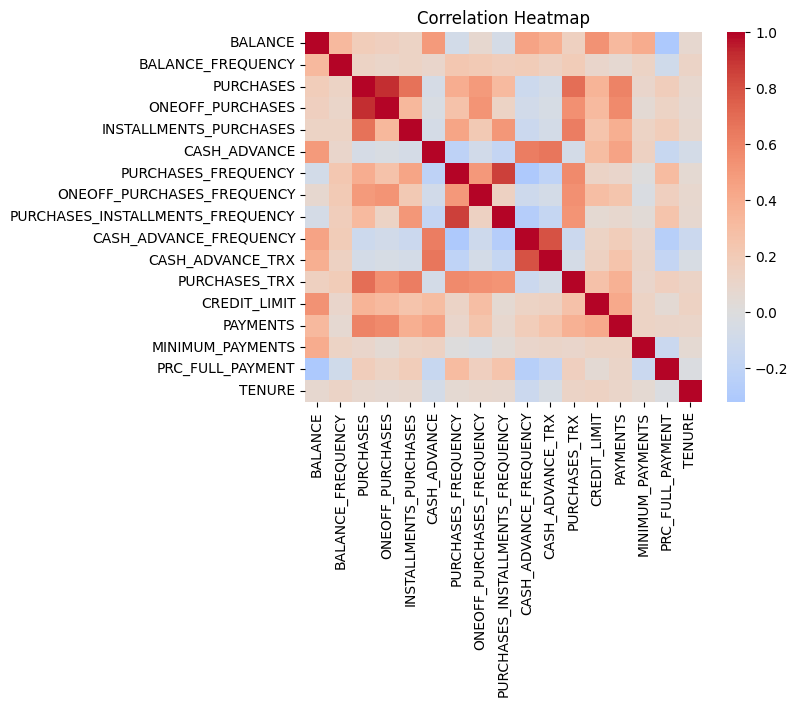

In [13]:
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

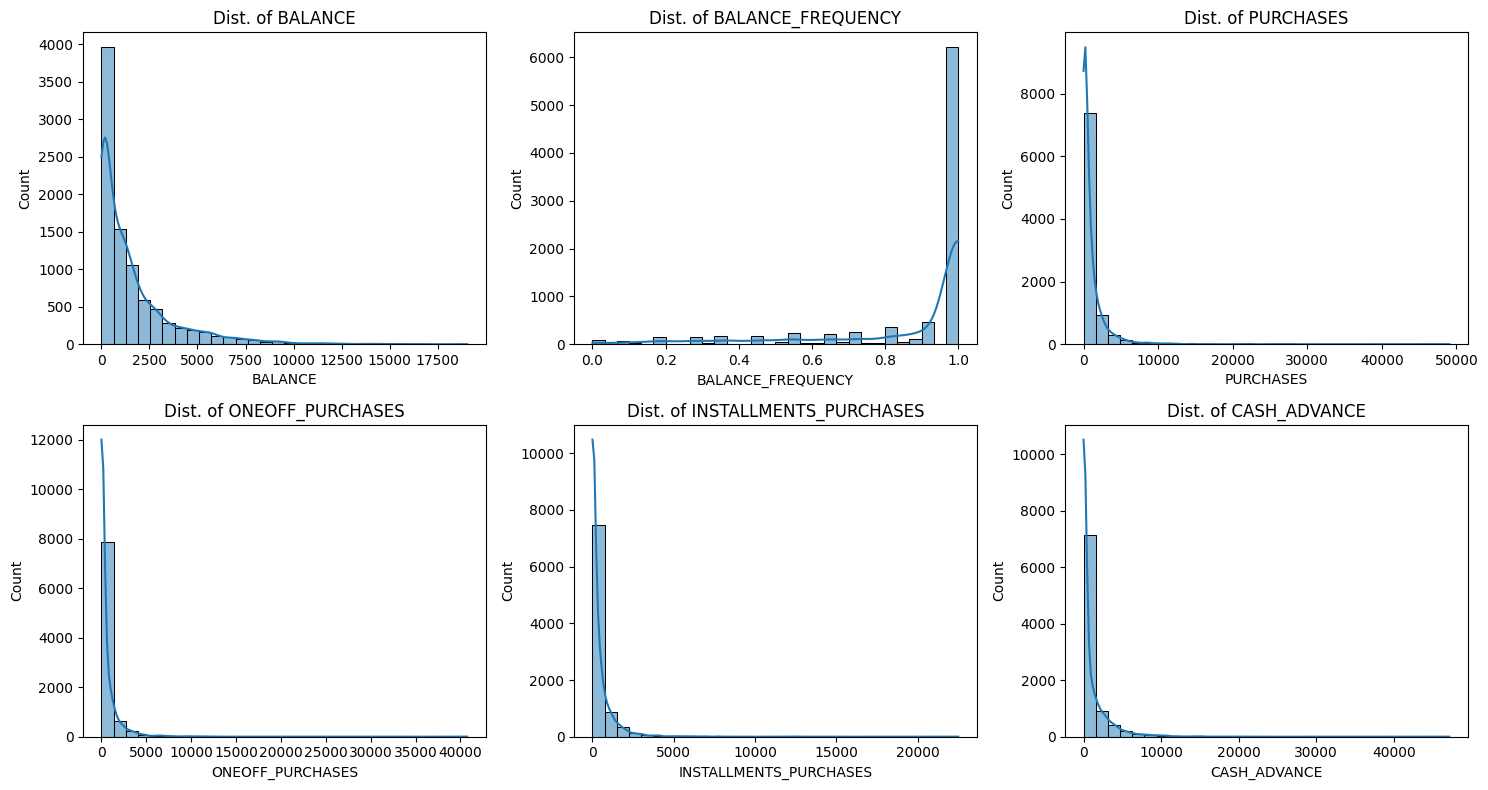

In [14]:
plt.figure(figsize=(15, 8))
for i, feat in enumerate(df.columns[0:6], 1):
    plt.subplot(2,3,i)
    sns.histplot(df[feat], bins=30, kde=True)
    plt.title(f"Dist. of {feat}")
plt.tight_layout()
plt.show()    

In [15]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns= df.columns)

df_scaled.sample(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6601,1.466558,0.518084,-0.469552,-0.356934,-0.454576,0.873476,-1.221758,-0.678661,-0.916995,-0.258913,0.696218,-0.591796,0.138993,-0.396811,4.440873,-0.525551,0.360680
1109,3.147168,0.518084,-0.290091,-0.356934,-0.030574,-0.466786,0.024043,-0.678661,0.131420,-0.675349,-0.476070,-0.310177,1.788050,0.086151,0.418783,-0.525551,0.360680
7163,-0.675422,-0.748323,-0.104776,0.112612,-0.454576,-0.466786,-0.225118,0.662184,-0.916995,-0.675349,-0.476070,-0.310177,-0.905410,-0.318171,-0.306057,-0.525551,-1.133803
3203,-0.591263,0.518084,1.720290,1.685324,0.970745,-0.466786,1.269843,2.673451,1.599199,-0.675349,-0.476070,1.822083,-0.548114,0.710507,-0.292632,2.893453,0.360680
8442,-0.749170,-2.935753,-0.445840,-0.356934,-0.398554,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.410693,-0.598688,-0.228307,-0.525551,0.360680
5435,-0.750531,-3.100221,-0.469552,-0.356934,-0.454576,-0.453222,-1.221758,-0.678661,-0.916995,0.038543,-0.329534,-0.591796,-0.410693,-0.598688,-0.228307,-0.525551,-3.375526
7375,2.181509,0.518084,-0.353133,-0.356934,-0.179520,3.612365,-1.014125,-0.678661,-0.707313,3.072586,6.704190,-0.511333,1.238364,0.031606,0.569455,-0.525551,0.360680
4458,0.072269,0.518084,0.466552,0.848034,-0.454576,-0.466786,-0.944914,-0.306204,-0.916995,-0.675349,-0.476070,-0.551565,-0.685536,-0.443830,-0.212663,-0.525551,-1.881044
8411,2.099598,0.518084,-0.469552,-0.356934,-0.454576,-0.322450,-1.221758,-0.678661,-0.916995,0.573963,0.256610,-0.591796,0.413836,-0.230470,0.664192,-0.525551,0.360680
804,-0.712358,0.134325,-0.105857,-0.042763,-0.171945,-0.466786,0.854576,0.997395,0.970151,-0.675349,-0.476070,0.212830,0.826100,-0.338295,-0.292431,-0.525551,0.360680


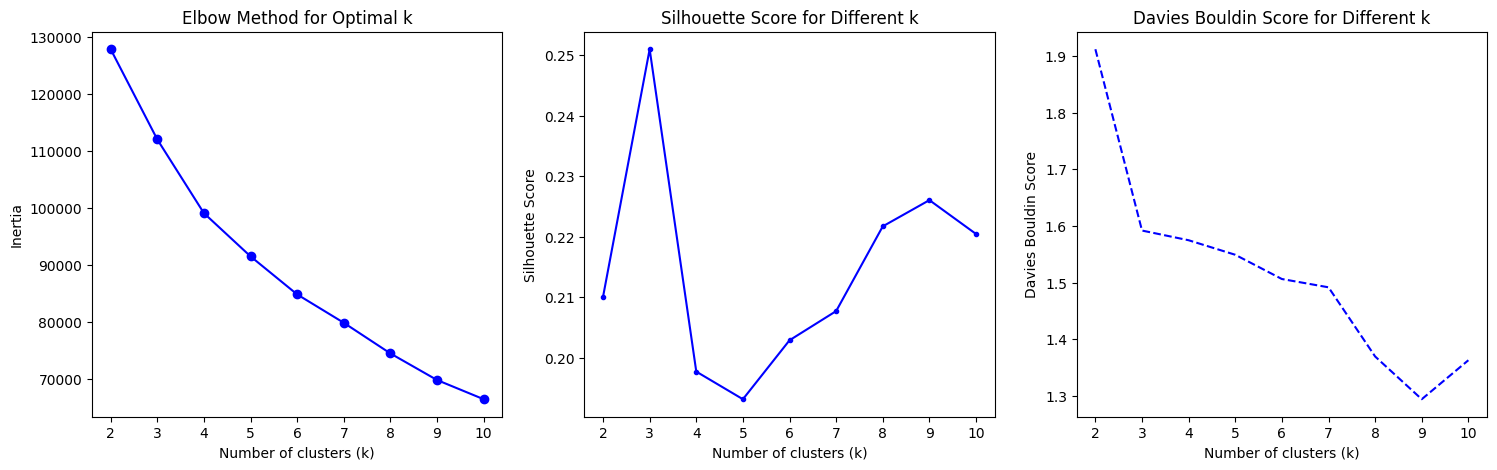

In [16]:
k_values = range(2, 11)

inertia_values = []
silhouette_scores = []
davies_bouldin_scores = []
for i in k_values:
    k_means = KMeans(n_clusters=i, random_state=42, n_init=10)
    k_means.fit(df_scaled)
    inertia_values.append(k_means.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, k_means.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(df_scaled, k_means.labels_))

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.subplot(1,3,2)
plt.plot(k_values, silhouette_scores, 'b.-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')

plt.subplot(1,3,3)
plt.plot(k_values, davies_bouldin_scores, 'b--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies Bouldin Score')
plt.title('Davies Bouldin Score for Different k')

plt.show()


In [17]:
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


In [18]:
model_kmeans = KMeans(n_clusters=3, random_state=111, n_init=10)
df['Cluster'] = model_kmeans.fit_predict(df_scaled)

In [19]:
print('Cluster Counts')
df['Cluster'].value_counts()

Cluster Counts


Cluster
0    6105
1    1593
2    1252
Name: count, dtype: int64

In [20]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


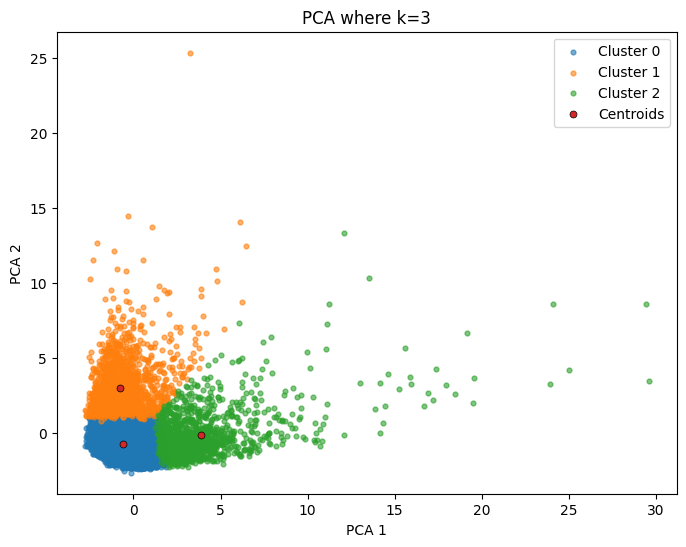

In [21]:

pca = PCA(n_components=2, random_state=42)
pca_coordinates = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(pca_coordinates, columns=["PCA1", "PCA2"], index=df_scaled.index)
pca_df["Cluster"] = df["Cluster"].values

df[["PCA1", "PCA2"]] = pca_df[["PCA1", "PCA2"]]

centers_2d = pca.transform(model_kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
for c in sorted(pca_df["Cluster"].unique()):
    subset = pca_df[pca_df["Cluster"] == c]
    plt.scatter(subset["PCA1"], subset["PCA2"], alpha=0.6, s=12, label=f"Cluster {c}")

plt.scatter(centers_2d[:, 0], centers_2d[:, 1], marker=".", s=100, edgecolor="black", linewidth=0.5, label="Centroids")

plt.title("PCA where k=3")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()



In [22]:
print("Explained variance ratio (PC1, PC2):", np.round(pca.explained_variance_ratio_, 4))
print("Total variance explained by first 2 PCs:", np.round(pca.explained_variance_ratio_.sum(), 4))

Explained variance ratio (PC1, PC2): [0.273  0.2031]
Total variance explained by first 2 PCs: 0.4761


In [23]:
df.sample(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,PCA1,PCA2
133,9354.060450,1.000000,796.33,796.33,0.00,13748.471310,0.083333,0.083333,0.000000,0.666667,16,1,13000.0,10664.658660,2600.875721,0.083333,12,1,0.280847,8.098694
4213,12.423203,0.909091,2292.41,2003.99,288.42,96.310823,0.916667,0.916667,0.916667,0.083333,1,36,7500.0,2411.035394,41.854466,0.000000,12,2,2.423809,-0.855910
673,1162.770552,1.000000,533.36,0.00,533.36,19.292323,0.666667,0.000000,0.583333,0.083333,1,8,1200.0,632.227172,1395.576542,0.000000,12,0,-0.407868,-0.834288
2661,623.955961,0.818182,0.00,0.00,0.00,2119.702403,0.000000,0.000000,0.000000,0.166667,3,0,1200.0,1838.851003,174.872521,0.250000,12,0,-1.773447,0.147797
7507,215.475718,1.000000,670.65,300.00,370.65,0.000000,1.000000,0.083333,0.916667,0.000000,0,18,3000.0,366.634123,185.037922,0.300000,12,0,0.537639,-1.757736
4893,1764.083164,1.000000,329.47,0.00,329.47,58.536178,1.000000,0.000000,1.000000,0.166667,2,22,1800.0,789.269658,798.373689,0.000000,12,0,0.269730,-0.814377
1238,1548.224072,1.000000,696.63,696.63,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,2,1800.0,588.329981,918.350562,0.000000,12,0,-1.230539,-0.424649
5936,2813.134224,0.818182,8834.96,8269.36,565.60,0.000000,0.750000,0.666667,0.583333,0.000000,0,24,7000.0,3788.138204,739.344097,0.000000,12,2,4.547892,0.119684
6627,1465.996562,1.000000,2498.92,222.99,2275.93,0.000000,1.000000,0.166667,1.000000,0.000000,0,36,3500.0,676.452393,421.840324,0.000000,12,2,1.995934,-1.309142
7021,222.957451,1.000000,0.00,0.00,0.00,1512.015822,0.000000,0.000000,0.000000,0.583333,14,0,1500.0,1856.738688,161.557965,0.166667,12,1,-1.974794,1.698326


Cluster 0: Shows less spender

Cluster 1: Shows medium/moderte spender

Cluster 2: Shows high spender

In [24]:
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


In [25]:

new_sample = [[1820.0004, 1.000000, 0, 0.00, 0, 586, 0.97, 0.000000, 0, 0.0, 1, 0, 17000, 18000, 968.638394, 0.000000, 12]]
new_arr = np.array(new_sample)
try:
	new_scaled = scaler.transform(new_arr)
	predicted_cluster = model_kmeans.predict(new_scaled)
	if predicted_cluster[0] == 0: 
		print(f"Predicted cluster is {predicted_cluster[0]}, so the person is low spender." )
	elif predicted_cluster[0] == 1: 
		print(f"Predicted cluster is {predicted_cluster[0]}, so the person is medium/moderte spender." )	
	elif predicted_cluster[0] == 2: 
		print(f"Predicted cluster is {predicted_cluster[0]}, so the person is high spender." )
	else:
		print('Error! Please try again.')
except Exception as e:
	print('Error! Please try again.', e)



Predicted cluster is 1, so the person is medium/moderte spender.
